In [1]:
import opendatasets as od
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'



In [2]:
dataset_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents' 
od.download(dataset_url)

Skipping, found downloaded files in "./us-accidents" (use force=True to force download)


In [3]:
data_dir = './us-accidents'

In [4]:
os.listdir(data_dir)

['.ipynb_checkpoints']

In [5]:
us_accidents = pd.read_csv('US_Accidents_Dec21_updated.csv')

## Brief Introduction: 
**This is a countrywide car accident dataset gotten from Kaggle website, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident (or event) data. Alaska is not covered in the datasets.**

In [6]:
us_accidents

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [7]:
copy = us_accidents.copy()

## Exploratory Data Analysis of the dataset:

In [8]:
us_accidents.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [9]:
us_accidents.sample(10)

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
1615330,A-1615331,2,2021-02-07 04:16:00,2021-02-07 06:24:27,34.035354,-118.328901,34.034954,-118.337341,0.484,Accident on Arlington Ave (I-10) from Crenshaw...,...,False,False,False,False,False,False,Night,Night,Night,Night
2302387,A-2302388,2,2020-01-15 20:00:00,2020-01-15 20:59:21,33.992640,-117.153760,33.992640,-117.153760,0.000,At San Timoteo Canyon Rd - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
266137,A-266138,2,2021-06-17 17:12:54,2021-06-17 18:48:55,34.188636,-79.806629,34.188123,-79.807631,0.067,Incident on W PALMETTO ST near HOUSE 1945 Driv...,...,False,False,False,False,False,False,Day,Day,Day,Day
936196,A-936197,2,2021-12-21 16:56:00,2021-12-21 18:45:00,32.462392,-84.929146,32.467272,-84.929598,0.338,Incident on 1-185 NB near BUENA VISTA RD Drive...,...,False,False,False,False,False,False,Day,Day,Day,Day
2212809,A-2212810,2,2020-03-22 12:48:33,2020-03-22 13:18:33,35.816530,-78.600670,35.816530,-78.600670,0.000,At Trawick Rd/Huntleigh Dr - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
2211555,A-2211556,3,2020-03-21 13:33:27,2020-03-21 14:08:25,39.664990,-75.604420,39.664990,-75.604420,0.000,At SR-273/Frenchtown Rd/Christiana Rd - Accide...,...,False,False,False,False,False,False,Day,Day,Day,Day
472153,A-472154,2,2021-11-01 16:41:30,2021-11-01 18:47:55,38.597146,-121.415261,38.598365,-121.416355,0.103,Slow traffic from Arden Way to Ethan Way due t...,...,False,False,False,False,False,False,Day,Day,Day,Day
1844605,A-1844606,2,2020-11-28 23:55:00,2020-11-29 02:09:41,34.145990,-117.189456,34.180560,-117.184256,2.407,INVLD OO VEH,...,False,False,False,False,False,False,Night,Night,Night,Night
2417060,A-2417061,2,2019-10-14 10:58:00,2019-10-14 12:13:00,37.040600,-112.242470,37.040290,-112.254490,0.663,At Seaman Canyon Rd (North) - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2314019,A-2314020,2,2020-01-23 17:16:00,2020-01-23 19:09:11,37.956260,-121.323120,37.956260,-121.323120,0.000,At Monte Diablo Ave - Accident. Obstruction on...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [10]:
us_accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

**Some of the columns are not assigned the right data type, so we shall be converting them to the right data type so that they can be worked with or analysed better.**

In [11]:
us_accidents['Start_Time'] = pd.to_datetime(us_accidents.Start_Time)
us_accidents['End_Time'] = pd.to_datetime(us_accidents.End_Time)
us_accidents['Weather_Timestamp'] = pd.to_datetime(us_accidents.Weather_Timestamp)

In [12]:
us_accidents.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


In [13]:
## searching for duplicate values
print('There are {} duplicate values in the dataset'.format(us_accidents.duplicated().sum().sum()))


There are 0 duplicate values in the dataset


In [14]:
##searching for null values in each column
us_accidents.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [15]:
us_accidents.shape
print('There are {} rows and {} columns in the dataset.'.format(us_accidents.shape[0], us_accidents.shape[1]))


There are 2845342 rows and 47 columns in the dataset.


## Questions about the data:

## **Which States have the highest and lowest accident rates in America in the last 5 years?**

In [16]:
# create a dictionary using US State code and their corresponding Name
us_states = {'AK': 'Alaska',
 'AL': 'Alabama',
 'AR': 'Arkansas',
 'AS': 'American Samoa',
 'AZ': 'Arizona',
 'CA': 'California',
 'CO': 'Colorado',
 'CT': 'Connecticut',
 'DC': 'District of Columbia',
 'DE': 'Delaware',
 'FL': 'Florida',
 'GA': 'Georgia',
 'GU': 'Guam',
 'HI': 'Hawaii',
 'IA': 'Iowa',
 'ID': 'Idaho',
 'IL': 'Illinois',
 'IN': 'Indiana',
 'KS': 'Kansas',
 'KY': 'Kentucky',
 'LA': 'Louisiana',
 'MA': 'Massachusetts',
 'MD': 'Maryland',
 'ME': 'Maine',
 'MI': 'Michigan',
 'MN': 'Minnesota',
 'MO': 'Missouri',
 'MP': 'Northern Mariana Islands',
 'MS': 'Mississippi',
 'MT': 'Montana',
 'NC': 'North Carolina',
 'ND': 'North Dakota',
 'NE': 'Nebraska',
 'NH': 'New Hampshire',
 'NJ': 'New Jersey',
 'NM': 'New Mexico',
 'NV': 'Nevada',
 'NY': 'New York',
 'OH': 'Ohio',
 'OK': 'Oklahoma',
 'OR': 'Oregon',
 'PA': 'Pennsylvania',
 'PR': 'Puerto Rico',
 'RI': 'Rhode Island',
 'SC': 'South Carolina',
 'SD': 'South Dakota',
 'TN': 'Tennessee',
 'TX': 'Texas',
 'UT': 'Utah',
 'VA': 'Virginia',
 'VI': 'Virgin Islands',
 'VT': 'Vermont',
 'WA': 'Washington',
 'WI': 'Wisconsin',
 'WV': 'West Virginia',
 'WY': 'Wyoming'}

# create a dataframe of State and their corresponding accident cases
state_df = pd.DataFrame(us_accidents['State'].value_counts()).reset_index().rename(columns={'index':'State', 'State':'Incidents'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): 
    return us_states[x]

state_df['State'] = state_df['State'].apply(convert)

states = list(state_df['State'])


In [17]:
state_df['Incident_Percentage'] = round(state_df.Incidents/state_df.Incidents.sum()*100, 2)


In [18]:
Top_10_States = state_df.head(10)
Top_10_States

,State,Incidents,Incident_Percentage
0,California,795868,27.97
1,Florida,401388,14.11
2,Texas,149037,5.24
3,Oregon,126341,4.44
4,Virginia,113535,3.99
5,New York,108049,3.80
6,Pennsylvania,99975,3.51
7,Minnesota,97185,3.42
8,North Carolina,91362,3.21
9,South Carolina,89216,3.14


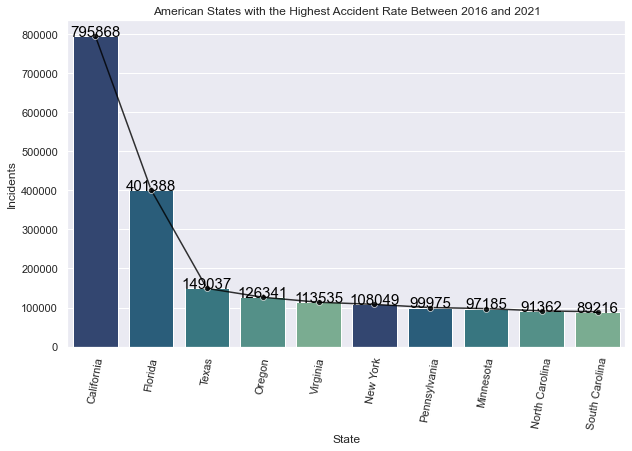

In [19]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,6)})
plt.xticks(rotation=80)
plt.rc('font', size=15)
pal = sns.color_palette("crest", len(Top_10_States))
sns.lineplot(x=Top_10_States.State, y=Top_10_States.Incidents, marker='o', color = 'black', alpha = .8);
ax = sns.barplot(x=Top_10_States.State, y=Top_10_States.Incidents, data=Top_10_States, palette=np.array(pal[::-2]));
ax.set(title='American States with the Highest Accident Rate Between 2016 and 2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**California has the highest amount of accidents in the USA in the last Five (5) years with almost 800, 000 accidents. This amounts to 27.97% of all accident cases in the USA and an average of almost 160, 000 every year, 436 accidents daily and 18 accidents per hour.**

**This numbers are considerably high in the context that California's numbers is almost double that of the State that comes second to it on the Top 10 list i.e. Florida.**

In [20]:
Lowest_10_States = state_df.tail(10)
Lowest_10_States

,State,Incidents,Incident_Percentage
39,Delaware,4842,0.17
40,Rhode Island,4451,0.16
41,New Hampshire,3866,0.14
42,Nebraska,3320,0.12
43,New Mexico,2370,0.08
44,North Dakota,2258,0.08
45,Maine,2193,0.08
46,Wyoming,990,0.03
47,Vermont,365,0.01
48,South Dakota,201,0.01


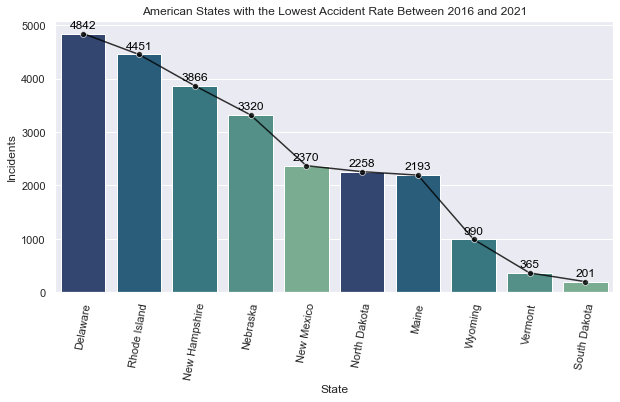

In [21]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=80)
plt.rc('font', size=12)
pal = sns.color_palette("crest", len(Lowest_10_States))
sns.lineplot(x=Lowest_10_States.State, y=Lowest_10_States.Incidents, marker='o', color = 'black', alpha = .8);
ax = sns.barplot(x=Lowest_10_States.State, y=Lowest_10_States.Incidents, data=Lowest_10_States, palette=np.array(pal[::-2]));
ax.set(title='American States with the Lowest Accident Rate Between 2016 and 2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**South Dakota had the lowest number of accidents in the USA with just 201 incidents between 2016 and 2021. This averages to 40 incidents per year, which is low and great considering the number of incidents recorded in the Top 10 states, which all had over 80, 000 incidents in the 5 years being analysed.**

**Which American Cities have the highest and lowest accident rates in the last 5 years?**

In [22]:
Top_10_Cities = us_accidents.City.value_counts().head(10)
Top_10_Cities

Miami          106966
Los Angeles     68956
Orlando         54691
Dallas          41979
Houston         39448
Charlotte       33152
Sacramento      32559
San Diego       26627
Raleigh         22840
Minneapolis     22768
Name: City, dtype: int64

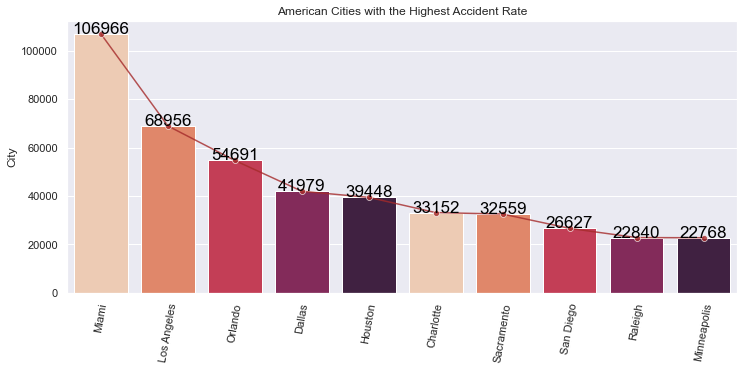

In [23]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=80)
plt.rc('font', size=17)
pal = sns.color_palette("rocket", len(Top_10_Cities.index))
sns.lineplot(x=Top_10_Cities.index, y=Top_10_Cities, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Top_10_Cities.index, y=Top_10_Cities, palette=np.array(pal[::-2]))
ax.set(title='American Cities with the Highest Accident Rate') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**Miami has the highest accident rate with over 100, 000 accidents in the last 5 years, which is higher than incidents recorded for some States on the Top 10 States and it accounts for over 25% of the incidents occurring in its State, Florida. Miami is followed by Los Angeles with over 68, 000 accidents.**


**We will briefly look at the severity of the accidents that have occurred in Miami and their impact on traffic over the last 5 years.**

In [24]:
Miami = us_accidents.loc[us_accidents.City == 'Miami']
Miami

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
29519,A-29520,4,2016-07-07 11:46:47,2016-07-07 17:46:47,36.862100,-94.851340,36.995870,-94.618050,15.857,Closed between OK-10/Exit 313 and Oklahoma/Mis...,...,False,False,False,False,False,False,Day,Day,Day,Day
31596,A-31597,2,2016-11-30 16:35:52,2016-11-30 22:35:52,25.786010,-80.258090,25.783360,-80.269110,0.710,At SR-953/42nd Ave/Le Jeune Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
31660,A-31661,2,2016-11-30 18:35:52,2016-12-01 00:35:52,25.662140,-80.388600,25.652920,-80.387120,0.644,At 120th St/Exit 19 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
31734,A-31735,2,2016-12-01 05:51:51,2016-12-01 11:51:51,25.970530,-80.165760,25.959950,-80.168700,0.753,At Ives Dairy Rd/203rd St/Exit 16 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
31735,A-31736,3,2016-12-01 06:03:23,2016-12-01 12:03:23,25.784470,-80.293460,25.784880,-80.284440,0.562,At SR-959/Red Rd - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844577,A-2844578,2,2019-08-22 17:10:33,2019-08-22 17:38:17,25.707913,-80.285176,25.707640,-80.285510,0.028,At SR-959/Red Rd/57th Ave - Accident.,...,False,False,False,False,True,False,Day,Day,Day,Day
2844578,A-2844579,4,2019-08-22 17:12:48,2019-08-22 17:42:07,25.909390,-80.209870,25.912360,-80.209700,0.205,Ramp closed to 151st St/Exit 11 - Road closed ...,...,False,False,False,False,False,False,Day,Day,Day,Day
2844996,A-2844997,4,2019-08-23 02:01:46,2019-08-23 02:30:39,25.927371,-80.212694,25.927371,-80.212694,0.000,Ramp to SR-826/Florida's Tpke/R Reagan Tpke - ...,...,False,False,False,False,False,False,Night,Night,Night,Night
2845009,A-2845010,2,2019-08-23 13:08:31,2019-08-23 13:37:40,25.812250,-80.237460,25.812460,-80.243590,0.382,At SR-9/27th Ave/Unity Blvd - Accident. Right ...,...,False,False,False,False,False,False,Day,Day,Day,Day


In [25]:
Miami_Severity = Miami['Severity'].value_counts().reset_index().rename(columns={'index':'severity_rank','Severity':'incidents'})
Miami_Severity

,severity_rank,incidents
0,2,102955
1,3,2379
2,4,1580
3,1,52


In [26]:
Miami_Severity['Incident_Percentage'] = round(Miami_Severity.incidents/Miami_Severity.incidents.sum() *100, 2)
Miami_Severity

,severity_rank,incidents,Incident_Percentage
0,2,102955,96.25
1,3,2379,2.22
2,4,1580,1.48
3,1,52,0.05


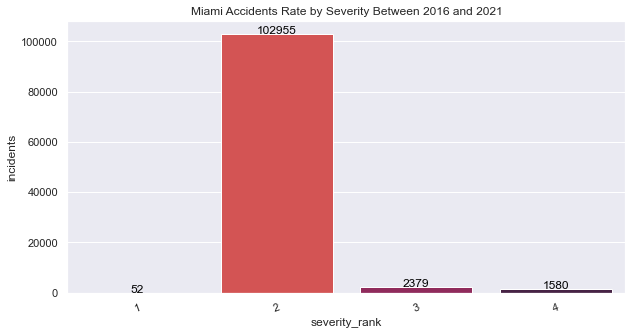

In [27]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=20)
plt.rc('font', size=12)
pal = sns.color_palette("rocket", len(Miami_Severity))
ax = sns.barplot(x=Miami_Severity.severity_rank, y=Miami_Severity.incidents, data=Miami_Severity, palette=np.array(pal[::-1]));
ax.set(title='Miami Accidents Rate by Severity Between 2016 and 2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center
    
    

**Although, the City of Miami had the highest accident rate in America, the impact of over 96% of these accidents on traffic was mild**

In [28]:
Lowest_10_Cities = us_accidents.City.value_counts().tail(10)
Lowest_10_Cities

Linn                            1
Stella                          1
York New Salem                  1
Algona                          1
Phil Campbell                   1
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, dtype: int64

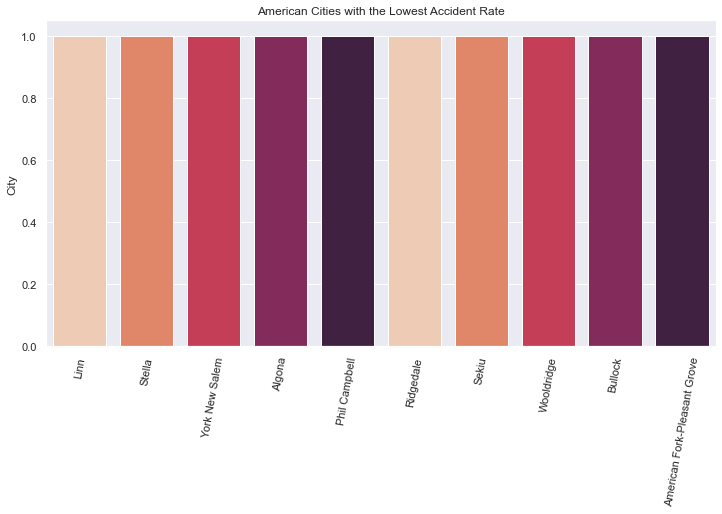

In [29]:

plt.figure(figsize=(12,6))
plt.xticks(rotation=80)
plt.rc('font', size=14)
plt.title('American Cities with the Lowest Accident Rate')
pal = sns.color_palette("rocket", len(Top_10_Cities))
sns.barplot(x=Lowest_10_Cities.index, y=Lowest_10_Cities, palette=np.array(pal[::-2]));



**The recording of just 1 accident in 10 cities over a period of 5 years may be an indication of inaccurate collection of data or under reporting of accidents.**

## **Which Counties have experienced the most and least incidents over a period of 5 years?**


In [30]:
County = us_accidents[['State', 'County']].value_counts().reset_index().rename(columns = {0:'Incidents'})
County['Incident_Percentage'] = round(County['Incidents']/County['Incidents'].sum()*100, 2)
County

,State,County,Incidents,Incident_Percentage
0,CA,Los Angeles,234122,8.23
1,FL,Miami-Dade,143939,5.06
2,FL,Orange,60566,2.13
3,CA,San Bernardino,55018,1.93
4,CA,Orange,51331,1.80
...,...,...,...,...
2846,MT,Daniels,1,0.00
2847,IL,Piatt,1,0.00
2848,LA,Red River,1,0.00
2849,MS,Winston,1,0.00


In [31]:
Top_10_County = County.head(10)
Top_10_County

,State,County,Incidents,Incident_Percentage
0,CA,Los Angeles,234122,8.23
1,FL,Miami-Dade,143939,5.06
2,FL,Orange,60566,2.13
3,CA,San Bernardino,55018,1.93
4,CA,Orange,51331,1.80
5,TX,Dallas,49630,1.74
6,CA,San Diego,48366,1.70
7,CA,Sacramento,46708,1.64
8,TX,Harris,42470,1.49
9,CA,Riverside,42176,1.48


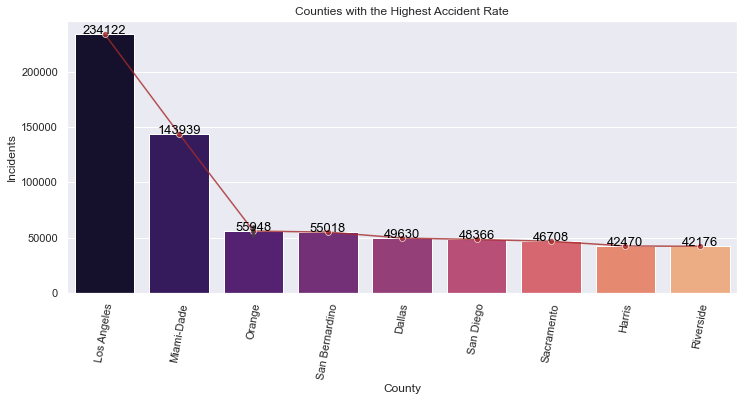

In [32]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=80)
plt.rc('font', size=13)
pal = sns.color_palette("magma", len(Top_10_County))
sns.lineplot(x=Top_10_County.County, y=Top_10_County.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Top_10_County.County, y=Top_10_County.Incidents, palette=np.array(pal[::1]))
ax.set(title='Counties with the Highest Accident Rate') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**Los Angeles County has the highest accident rate with over 230, 000 cases in 5 years, which amounts to a third of its State, California's, accident cases.**


In [33]:
Lowest_10_County = County.tail(10)
Lowest_10_County

,State,County,Incidents,Incident_Percentage
2841,OK,Washita,1,0.0
2842,LA,Saint James,1,0.0
2843,LA,La Salle,1,0.0
2844,OK,Woods,1,0.0
2845,LA,Morehouse,1,0.0
2846,MT,Daniels,1,0.0
2847,IL,Piatt,1,0.0
2848,LA,Red River,1,0.0
2849,MS,Winston,1,0.0
2850,GA,Marion,1,0.0


**These Counties having 1 accident over a period of 5 years seem inaccurate or suggests under reporting except it can be attributed to other factors such as low population e.g. some of the Counties have population just a little over 2200, however, Waynesboro City has over 22,000 so further investigations may need to be done.**

## **Which Zip Codes experienced the most and least incidents over the period of 5 years?**

In [34]:
Zip_Code = us_accidents[['Zipcode', 'County', 'State']].value_counts()
Top_10_ZipCode = us_accidents[['Zipcode', 'County', 'State']].value_counts().head(10).reset_index().rename(columns = {0: 'Incidents'})
Least_10_ZipCode = us_accidents[['Zipcode', 'County', 'State']].value_counts().tail(10).reset_index().rename(columns = {0: 'Incidents'})


In [35]:
Top_10_ZipCode

,Zipcode,County,State,Incidents
0,91761,San Bernardino,CA,6162
1,33186,Miami-Dade,FL,5248
2,92407,San Bernardino,CA,4528
3,92507,Riverside,CA,4527
4,91706,Los Angeles,CA,4471
5,33183,Miami-Dade,FL,3518
6,92324,San Bernardino,CA,3465
7,32819,Orange,FL,3455
8,33169,Miami-Dade,FL,3436
9,91765,Los Angeles,CA,3189


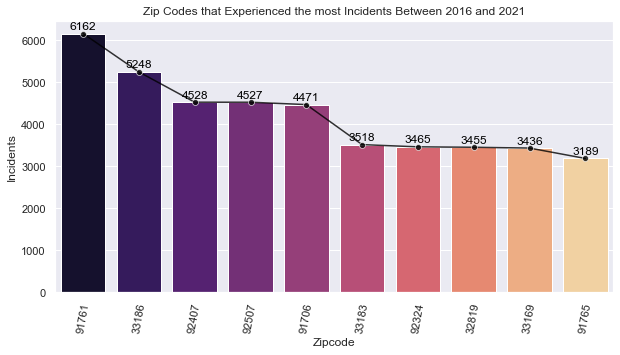

In [36]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=80)
plt.rc('font', size=12)
pal = sns.color_palette("magma", len(Top_10_ZipCode))
sns.lineplot(x=Top_10_ZipCode.Zipcode, y=Top_10_ZipCode.Incidents, marker='o', color = 'black', alpha = .8);
ax = sns.barplot(x=Top_10_ZipCode.Zipcode, y=Top_10_ZipCode.Incidents, data=Top_10_ZipCode, palette=np.array(pal[::1]));
ax.set(title='Zip Codes that Experienced the most Incidents Between 2016 and 2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**Zip Code 91761 in San Bernadino, Calififornia has experienced the most accidents in Africa with over 6000 incidents, averaging 1200 incidents yearly and 3 accidents daily. Reasons for this may need to be investigated in order to identify ways of reducing or preventing so much incidents.** 

**Only California and Miami make up the list of the Top 10 Zip Codes with the most accidents.**

In [37]:
Least_10_ZipCode

,Zipcode,County,State,Incidents
0,59870-6643,Ravalli,MT,1
1,59870-6647,Ravalli,MT,1
2,59870-6662,Ravalli,MT,1
3,59870-6671,Ravalli,MT,1
4,29585-6517,Georgetown,SC,1
5,59870-6677,Ravalli,MT,1
6,59870-6679,Ravalli,MT,1
7,59870-6682,Ravalli,MT,1
8,59870-6685,Ravalli,MT,1
9,55017-5109,Isanti,MN,1


## **Which streets experienced the most accidents over the period of 5 years?**

In [38]:
Street_Analysis = us_accidents[['Street', 'State']].value_counts().head(10).reset_index().rename(columns={0:'Incidents'})
Street_Analysis


,Street,State,Incidents
0,I-5 N,CA,21237
1,I-95 S,FL,18603
2,I-95 N,FL,18039
3,I-5 S,CA,16694
4,I-10 E,CA,16618
5,I-10 W,CA,15943
6,I-5 N,OR,12514
7,I-405 N,CA,11854
8,CA-99 N,CA,10041
9,I-80 W,CA,9381


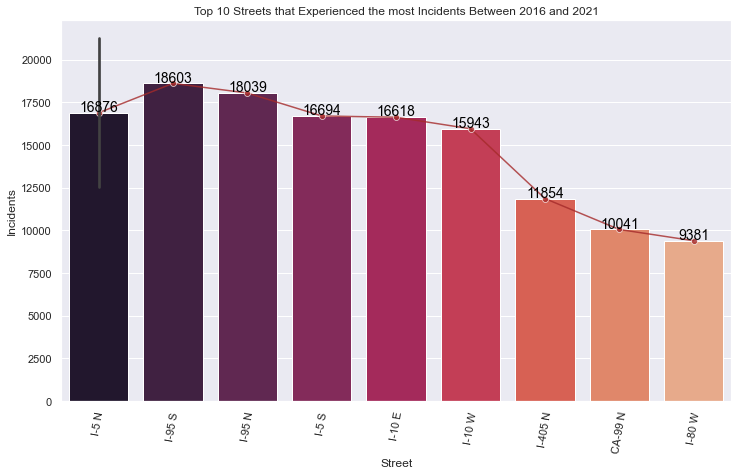

In [39]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,7)})
plt.xticks(rotation=80)
plt.rc('font', size=14)
pal = sns.color_palette("rocket", len(Street_Analysis))
sns.lineplot(x=Street_Analysis.Street, y=Street_Analysis.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Street_Analysis.Street, y=Street_Analysis.Incidents, data=Street_Analysis, palette=np.array(pal[::1]));
ax.set(title='Top 10 Streets that Experienced the most Incidents Between 2016 and 2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**Street 1-5N in California has experienced the most accidents over the last 5 years with over 21, 000 accidents so far.**

**California also has 7 streets in the Top 10 streets accidents in the last 5 years, with none experiencing not less than 9000 accidents each**

## **At which hour of the day do most accidents occur or least occur in the last 5 years?**

In [40]:
hour = us_accidents['Start_Time'].dt.hour.value_counts().reset_index()
hour = hour.reindex([19, 20, 21, 23, 22, 17, 11, 7, 8, 12, 13, 10, 6, 5, 3, 2, 1, 0, 4, 9, 14, 15, 16, 18]).rename(columns={'index':'Hour', 'Start_Time':'Incidents'})
hour

,Hour,Incidents
19,0,68800
20,1,59370
21,2,55443
23,3,48656
22,4,51805
17,5,80303
11,6,111160
7,7,135191
8,8,130879
12,9,108779


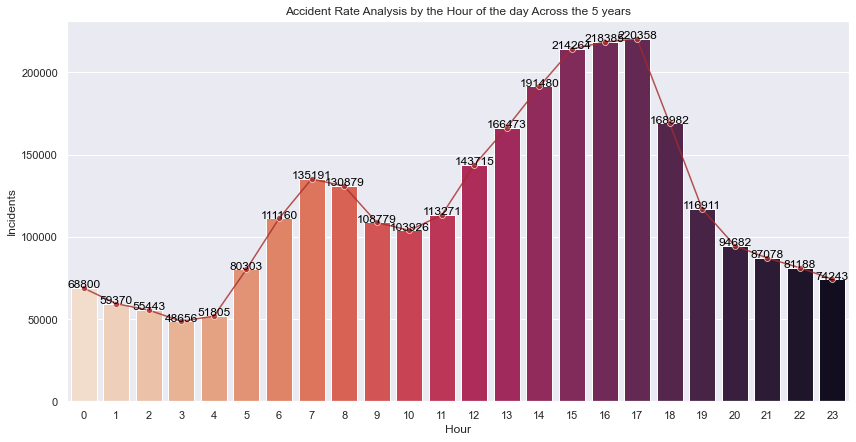

In [41]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(14,7)})
plt.xticks(rotation=0)
plt.rc('font', size=12)
pal = sns.color_palette("rocket", len(hour.index))
sns.lineplot(x=hour.Hour, y=hour.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=hour.Hour, y=hour.Incidents, palette=np.array(pal[::-1]))
ax.set(title='Accident Rate Analysis by the Hour of the day Across the 5 years') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**From the above, it is clear that the least amount of accidents occurs in the middle of the night between 12am and 4am. Then it begins to rise as the morning breaks with the highest morning accidents happening around 7am, then it falls and rises again from 10am until 5pm, having the highest number of accidents in the day with over 220, 000 accidents then it drops again.**

**The highest numbers of accidents in the morning and afternoon occurring at 7am and 5pm suggests peak time accidents and may be due to rush to work and home from work.**

## **What was the time zone when most accidents occurred?**

In [42]:
Time_Zone=us_accidents['Timezone'].value_counts().reset_index().rename(columns={'index':'Time_Zone', 'Timezone':'Incidents'})
Time_Zone


,Time_Zone,Incidents
0,US/Eastern,1221927
1,US/Pacific,967094
2,US/Central,488065
3,US/Mountain,164597


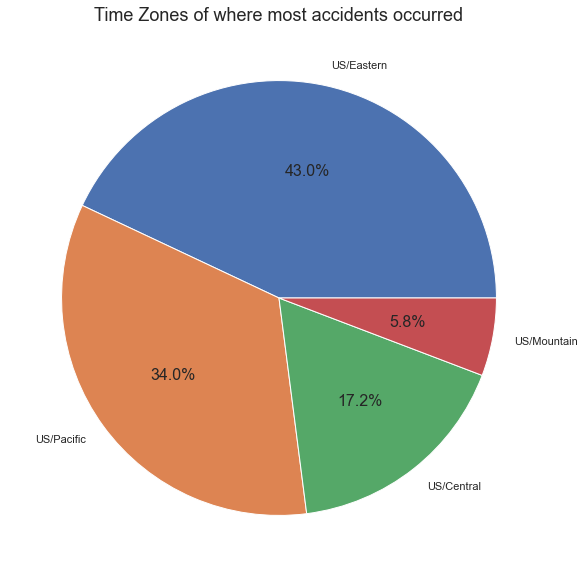

In [43]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title('Time Zones of where most accidents occurred', fontsize = 18)
plt.rc('font', size=16)
palette_color = sns.color_palette('bright')

plt.pie(Time_Zone['Incidents'] , labels=Time_Zone['Time_Zone'], autopct='%.1f%%');

**43% of most accidents occurred in the US/Eastern Time Zone, whilst the least number of accidents occurred at US/Mountain Time Zone at 5%**

## **On which week day did most accidents occur or least occur in the last 5 years?**

In [44]:
Week_day = us_accidents['Start_Time'].dt.day_name().value_counts().reset_index().rename(columns={'index':'Day', 'Start_Time':'Incidents'})
Week_day = Week_day.reindex([4, 3, 2, 1, 0, 5, 6]).reset_index()
Week_day.drop(columns= 'index', inplace=True)
Week_day


,Day,Incidents
0,Monday,419821
1,Tuesday,443968
2,Wednesday,455037
3,Thursday,463477
4,Friday,492074
5,Saturday,311691
6,Sunday,259274


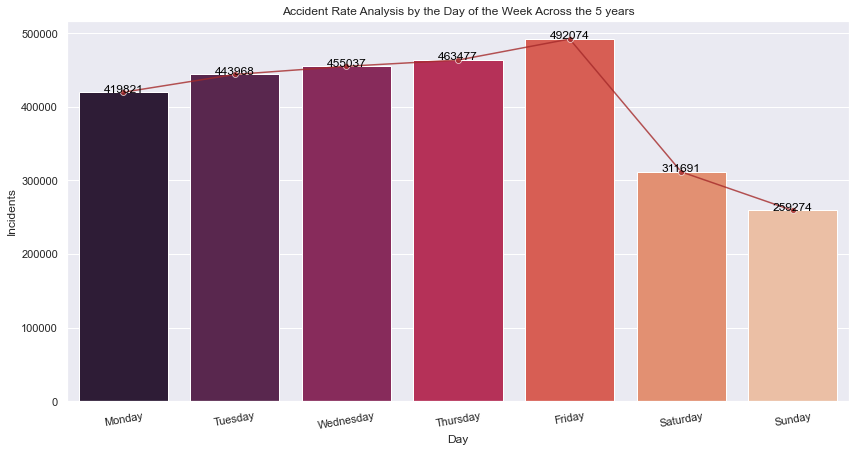

In [45]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(14,7)})
plt.xticks(rotation=10)
plt.rc('font', size=12)
pal = sns.color_palette("rocket", len(Week_day.index))
sns.lineplot(x=Week_day.Day, y=Week_day.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Week_day.Day, y=Week_day.Incidents, palette=np.array(pal[::1]))
ax.set(title='Accident Rate Analysis by the Day of the Week Across the 5 years') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**The highest number of accidents were recorded on Friday, whilst the lowest is recorded on Sunday.**

## **Which month did most accidents occur or least occur in the last 5 years?**

In [46]:
Month = us_accidents['Start_Time'].dt.month_name().value_counts().reset_index().rename(columns={'index':'Month', 'Start_Time':'Incidents'})
Month = Month.reindex([5, 6, 11, 9, 7, 4, 10, 8, 3, 2, 1, 0]).reset_index()
Month.drop(columns= 'index', inplace=True)
Month


,Month,Incidents
0,January,198365
1,February,194995
2,March,158224
3,April,171880
4,May,181944
5,June,226561
6,July,159111
7,August,178670
8,September,241822
9,October,299131


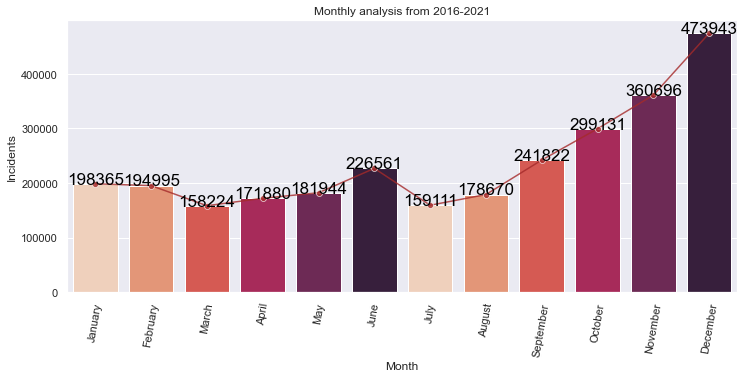

In [47]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=80)
plt.rc('font', size=17)
pal = sns.color_palette("rocket", len(Month.index))
sns.lineplot(x=Month.Month, y=Month.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Month.Month, y=Month.Incidents, palette=np.array(pal[::-2]))
ax.set(title='Monthly analysis from 2016-2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**December record the most number of accidents, whilst, March records the lowest number of accidents.**

**As December has the most accidents recorded, lets assess which day has the most or least accidents recorded over the 5 year period**

In [48]:
Top_10_daily_accidents = us_accidents['Start_Time'].dt.date.value_counts().head(10).reset_index().rename(columns={'index':'Dates', 'Start_Time':'Incidents'})
Top_10_daily_accidents 

,Dates,Incidents
0,2021-12-23,12904
1,2021-12-17,11505
2,2021-12-10,11014
3,2021-12-15,10603
4,2021-12-16,10362
5,2021-12-14,10298
6,2021-12-03,10282
7,2021-12-30,10171
8,2021-12-22,9785
9,2021-12-07,9434


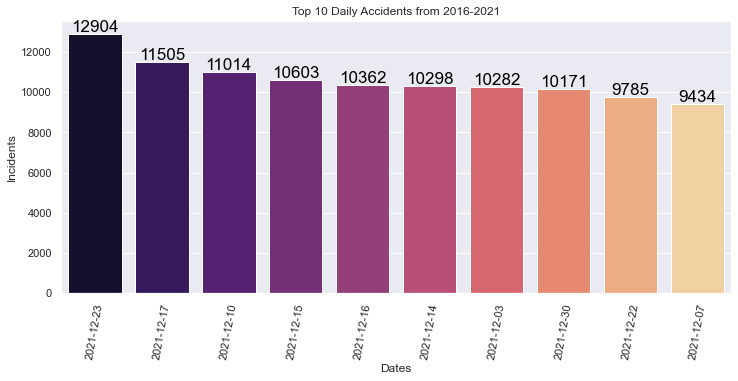

In [49]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=80)
plt.rc('font', size=17)
pal = sns.color_palette("magma", len(Top_10_daily_accidents.index))
ax = sns.barplot(x=Top_10_daily_accidents.Dates, y=Top_10_daily_accidents.Incidents, palette=np.array(pal[::1]))
ax.set(title='Top 10 Daily Accidents from 2016-2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**All top 10 daily accidents occurred in Dec 2021 with nothing less than 9000 accidents and the highest being almost 13000, 2 days before Christmas.**

In [50]:
lowest_20_daily_accidents = us_accidents['Start_Time'].dt.date.value_counts().tail(20)
lowest_20_daily_accidents

2020-08-05    2
2020-08-02    2
2016-05-06    2
2016-04-15    2
2019-12-01    2
2019-08-24    2
2016-10-28    2
2020-09-04    1
2020-08-12    1
2019-11-28    1
2020-09-07    1
2020-09-05    1
2020-08-01    1
2016-09-21    1
2016-06-15    1
2020-08-15    1
2019-11-27    1
2020-07-28    1
2020-08-07    1
2020-08-28    1
Name: Start_Time, dtype: int64

**The lowest recorded accidents occurred before 2021.**

## **Accident trend across the last 5 years?**

In [51]:
Year = us_accidents['Start_Time'].dt.year.value_counts().sort_values('index', ascending= True).reset_index().rename(columns={'index':'Year','Start_Time':'Incidents'})
Year = Year.reindex([0, 2, 1, 3, 4, 5]).reset_index()
Year.drop(columns = 'index', inplace= True)
Year



/var/folders/wv/45z6jm6d1ndbt4vr7ylqjg2c0000gn/T/ipykernel_22476/3131831901.py:1: FutureWarning: In a future version of pandas all arguments of Series.sort_values will be keyword-only.
  Year = us_accidents['Start_Time'].dt.year.value_counts().sort_values('index', ascending= True).reset_index().rename(columns={'index':'Year','Start_Time':'Incidents'})


,Year,Incidents
0,2016,122024
1,2017,163918
2,2018,163176
3,2019,258615
4,2020,625864
5,2021,1511745


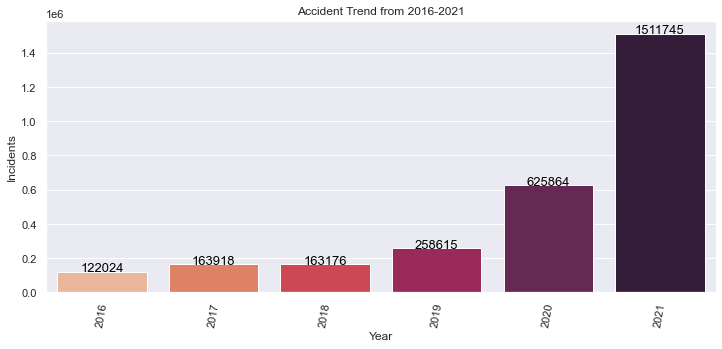

In [52]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=80)
plt.rc('font', size=13)
pal = sns.color_palette("rocket", len(Year.index))
ax = sns.barplot(x=Year.Year, y=Year.Incidents, palette=np.array(pal[::-1]))
ax.set(title='Accident Trend from 2016-2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black'); # sets vertical alignment (va) to center
  

**From the above, it is clear that the accidents begin to steadily rise from 2016. However, from 2019 the numbers begin to drastically increase, with 2020 numbers more than double of 2019 and 2021 numbers are almost 3x that of 2021.**

 ## **How severe were the accidents and how did they affect traffic from 2016 - 2021**

In [61]:
# create a dictionary using US State code and their corresponding Name
Impact = {1: 'Low Impact',
 2: 'Moderate Impact',
 3: 'High Impact',
 4: 'Very High Impact'}

# create a dataframe of State and their corresponding accident cases
Severity = pd.DataFrame(us_accidents['Severity'].value_counts()).reset_index().rename(columns={'index':'Severity_Rating', 'Severity':'Incidents'})


# Function to convert the State Code with the actual corressponding Name
def convert(x): 
    return Impact[x]

Severity['Rating'] = Severity['Severity_Rating'].apply(convert)

Count = list(Severity['Rating'])
Count



['Moderate Impact', 'High Impact', 'Very High Impact', 'Low Impact']

In [62]:
Severity

,Severity_Rating,Incidents,Rating
0,2,2532991,Moderate Impact
1,3,155105,High Impact
2,4,131193,Very High Impact
3,1,26053,Low Impact


In [63]:
Severity['Severity_Percent'] = round(Severity.Incidents/Severity.Incidents.sum()*100, 2)
Severity

,Severity_Rating,Incidents,Rating,Severity_Percent
0,2,2532991,Moderate Impact,89.02
1,3,155105,High Impact,5.45
2,4,131193,Very High Impact,4.61
3,1,26053,Low Impact,0.92


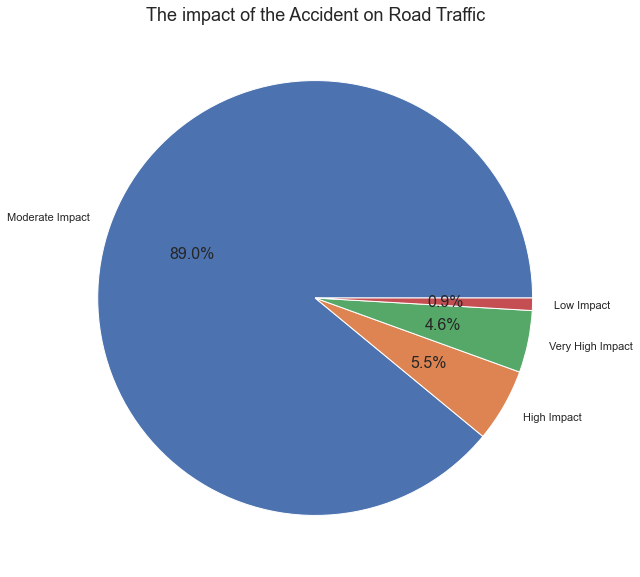

In [64]:
plt.figure(figsize=(14, 10))
plt.xticks(rotation=90)
plt.title('The impact of the Accident on Road Traffic', fontsize = 18)
plt.rc('font', size=16)
palette_color = sns.color_palette('bright')
explode = [0, 0.1]

plt.pie(Severity['Severity_Percent'] , labels=Severity['Rating'], autopct='%.1f%%');


**89% of the all the accidents were a level 2 in severity and their impact on traffic was moderate. Whilst, low impact recorded the lowest number at 0.9%**

## **Does visibility have an impact on the Accident Rate?**

In [65]:
Visibility = us_accidents['Visibility(mi)'].value_counts().reset_index()
Highest_Visibility_Accidents = Visibility.head(10).rename(columns={'index':'Mile_Distance', 'Visibility(mi)':'Incidents'})
Highest_Visibility_Accidents


,Mile_Distance,Incidents
0,10.0,2230276
1,7.0,79649
2,9.0,68817
3,8.0,55955
4,5.0,53933
5,6.0,49051
6,2.0,46160
7,4.0,45437
8,3.0,44012
9,1.0,38445


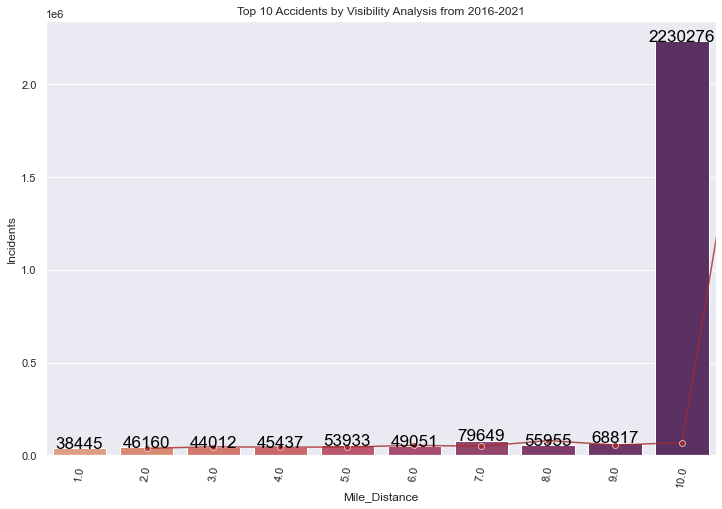

In [66]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,8)})
plt.xticks(rotation=80)
plt.rc('font', size=17)
pal = sns.color_palette("flare", len(Highest_Visibility_Accidents.index))
sns.lineplot(x=Highest_Visibility_Accidents.Mile_Distance, y=Highest_Visibility_Accidents.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Highest_Visibility_Accidents.Mile_Distance, y=Highest_Visibility_Accidents.Incidents, palette=np.array(pal[::1]))
ax.set(title='Top 10 Accidents by Visibility Analysis from 2016-2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+10, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center
    

In [67]:
Lowest_Visibility_Accidents= Visibility.tail(10).rename(columns={'index':'Mile_Distance', 'Visibility(mi)':'Incidents'})
Lowest_Visibility_Accidents

,Mile_Distance,Incidents
66,0.7,1
67,34.0,1
68,110.0,1
69,130.0,1
70,111.0,1
71,6.2,1
72,63.0,1
73,43.0,1
74,36.0,1
75,19.0,1


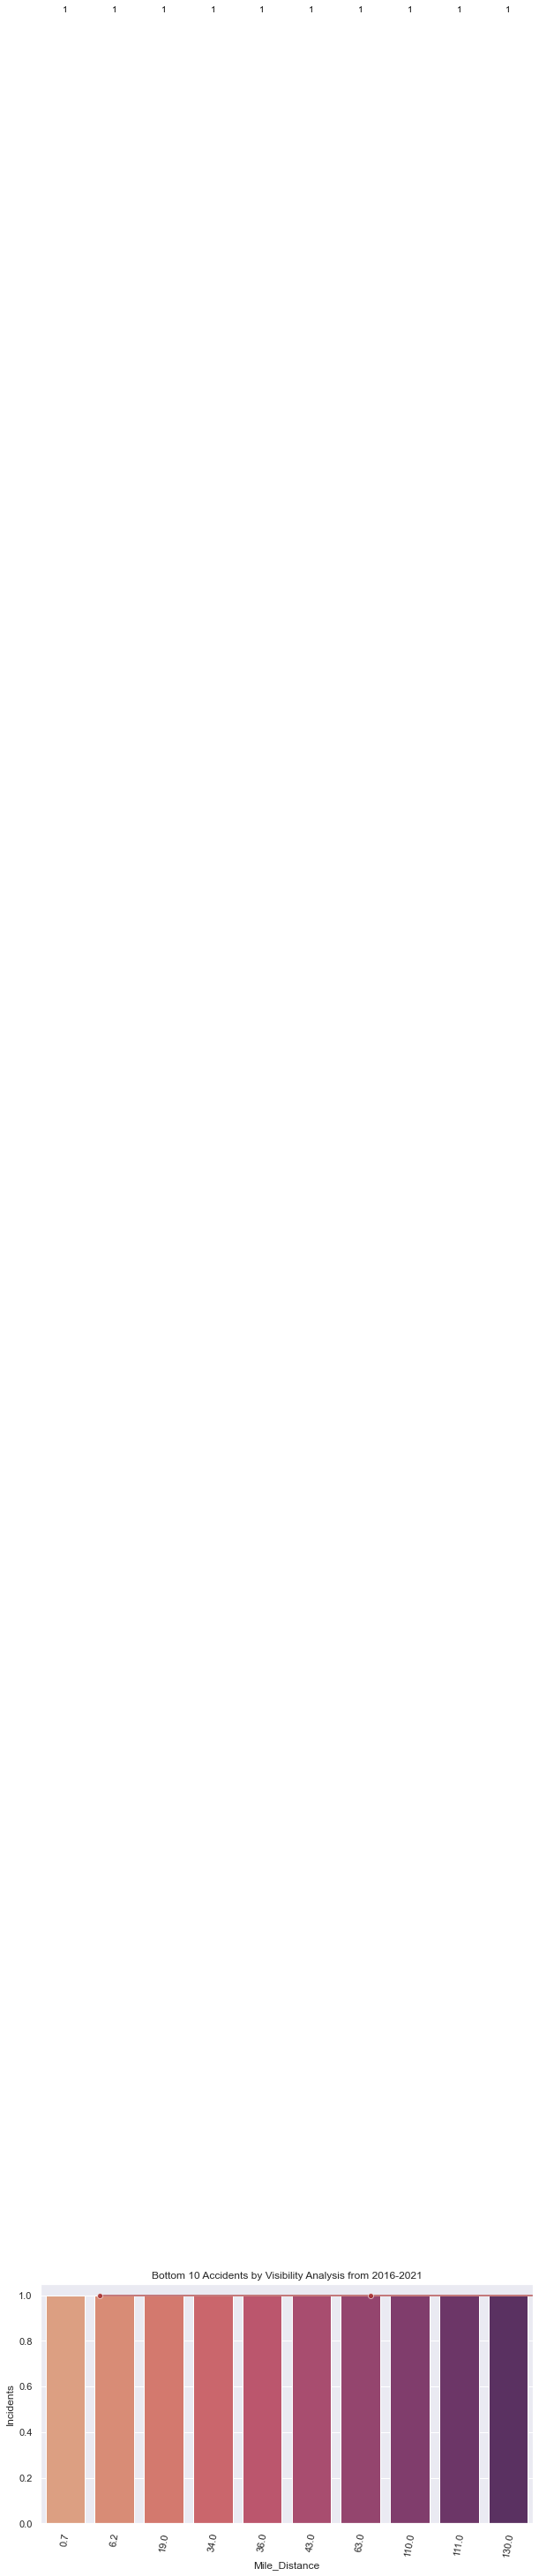

In [68]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=80)
plt.rc('font', size=10)
pal = sns.color_palette("flare", len(Lowest_Visibility_Accidents.index))
sns.lineplot(x=Lowest_Visibility_Accidents.Mile_Distance, y=Lowest_Visibility_Accidents.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Lowest_Visibility_Accidents.Mile_Distance, y=Lowest_Visibility_Accidents.Incidents, palette=np.array(pal[::1]))
ax.set(title='Bottom 10 Accidents by Visibility Analysis from 2016-2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+10, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center
    

**The highest number of accidents occurred at the 10miles visibility range.**

**From the above, it can be insinuated that when the visibility distance is shorter, accidents highly occur, whilst if the visibility distance is further, the accident rate is lower except in a few instances as seen with 0.7 and 62.** 

## **What is the condition of the road near the accident?**

In [69]:
Bump = us_accidents.Bump.value_counts()
Exit = us_accidents.No_Exit.value_counts()
Turning_Loop = us_accidents.Turning_Loop.value_counts()
Give_Way = us_accidents.Give_Way.value_counts()
Roundabout = us_accidents.Roundabout.value_counts()
Crossing = us_accidents.Crossing.value_counts()
Traffic_Calming = us_accidents.Traffic_Calming.value_counts()
Stop = us_accidents.Stop.value_counts()
Traffic_Signal = us_accidents.Traffic_Signal.value_counts()
Junction=us_accidents.Junction.value_counts()

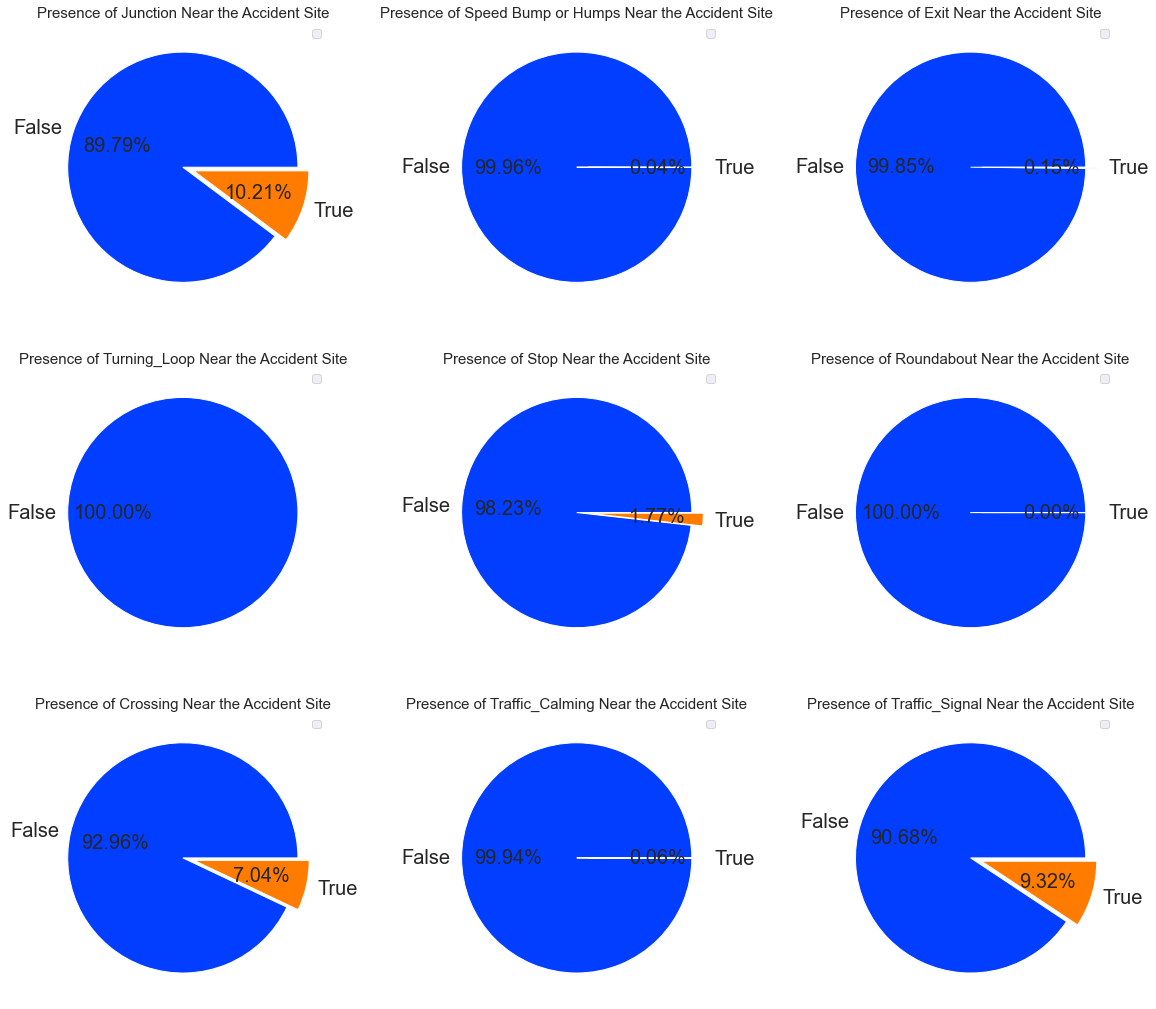

In [72]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))
axes[0,0].legend(['True', 'False']);
axes[0,0].set_title('Presence of Junction Near the Accident Site', fontsize = 15)
axes[0,0].pie(Junction, labels=Junction.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[0,1].legend(['True', 'False']);
axes[0,1].set_title('Presence of Speed Bump or Humps Near the Accident Site', fontsize = 15)
axes[0,1].pie(Bump, labels=Bump.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[0,2].legend(['True', 'False']);
axes[0,2].set_title('Presence of Exit Near the Accident Site', fontsize = 15)
axes[0,2].pie(Exit, labels=Exit.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[1,0].legend(['True', 'False']);
axes[1,0].set_title('Presence of Turning_Loop Near the Accident Site', fontsize = 15)
axes[1,0].pie(Turning_Loop, labels=Turning_Loop.index, colors = palette_color, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[1,1].legend(['True', 'False']);
axes[1,1].set_title('Presence of Stop Near the Accident Site', fontsize = 15)
axes[1,1].pie(Stop, labels=Stop.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[1,2].legend(['True', 'False']);
axes[1,2].set_title('Presence of Roundabout Near the Accident Site', fontsize = 15)
axes[1,2].pie(Roundabout, labels=Roundabout.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[2,0].legend(['True', 'False']);
axes[2,0].set_title('Presence of Crossing Near the Accident Site', fontsize = 15)
axes[2,0].pie(Crossing, labels=Crossing.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[2,1].legend(['True', 'False']);
axes[2,1].set_title('Presence of Traffic_Calming Near the Accident Site', fontsize = 15)
axes[2,1].pie(Traffic_Calming, labels=Traffic_Calming.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[2,2].legend(['True', 'False']);
axes[2,2].set_title('Presence of Traffic_Signal Near the Accident Site', fontsize = 15)
axes[2,2].pie(Traffic_Signal, labels=Traffic_Signal.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');



**Most of the accidents occurred where:**
- 10.21% accidents occurred near a  Junction .

- 99.94% Road accidents occurred near where Traffic Calming were absent.

- 92.96% Road accidents occurred near where crossing were absent. 

- 90.68% Road accidents occurred near where Traffic Signals were absent.

- In 98.23% cases, there were no Stop near the scene of the accident.

- There were no accident cases recorded near the Turning Loop.

- There were no accident cases recorded near the Roundabout.

- 99.96% Road accidents occurred near where Speed bumps and humps were absent.

- 99.85% Road accidents occurred near where exits were absent.

## **What was the main weather condition at the time of each accident?**

In [73]:
Weather_Condition = us_accidents.Weather_Condition.value_counts().head(10).reset_index().rename(columns={'index':'Condition','Weather_Condition':'Incidents'})
Weather_Condition


,Condition,Incidents
0,Fair,1107194
1,Mostly Cloudy,363959
2,Cloudy,348767
3,Partly Cloudy,249939
4,Clear,173823
5,Light Rain,128403
6,Overcast,84882
7,Scattered Clouds,45132
8,Light Snow,43752
9,Fog,41226


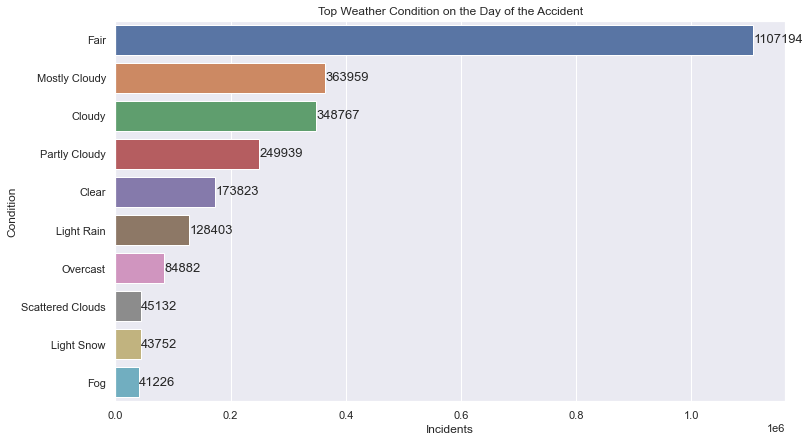

In [74]:
# plot horizontal barplot
sns.set(rc={'figure.figsize':(12,7)})
plt.rc('font', size=13)
ax = sns.barplot(y= Weather_Condition.Condition, x= Weather_Condition.Incidents, data=Weather_Condition, orient='h')
ax.set(title='Top Weather Condition on the Day of the Accident') # title barplot
# label each bar in barplot
for p in ax.patches:
    height = p.get_height() # height of each horizontal bar is the same
    width = p.get_width() # width (average number of passengers)
 # adding text to each bar
    ax.text(x = width+3, # x-coordinate position of data label, padded 3 to right of bar
    y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
    s = '{:.0f}'.format(width), # data label, formatted to ignore decimals
    va = 'center') # sets vertical alignment (va) to center


**The weather condition during the majority of the accidents was mainly fair, whilst the fog was the least recorded weather condition during accidents.**

## **What was the wind Speed at the time of the accident?**

In [75]:
Wind_Speed = us_accidents['Wind_Speed(mph)'].value_counts().reset_index().rename(columns={'index':'Speed','Wind_Speed(mph)':'Incidents'})
Wind_Speed


,Speed,Incidents
0,0.0,433636
1,5.0,231000
2,3.0,225664
3,6.0,222502
4,7.0,205667
...,...,...
131,1087.0,1
132,243.0,1
133,51.8,1
134,174.9,1


In [76]:
bins = (0, 5, 10, 20, 30, 40, 50, 100, 1200)
Wind_Speed['Speed_binned'] = pd.cut(Wind_Speed['Speed'], bins)
Speed_Analysis = Wind_Speed.groupby('Speed_binned')['Incidents'].sum()
Speed_Analysis= Speed_Analysis.reset_index()
Speed_Analysis['Speed_binned'] = Speed_Analysis['Speed_binned'].astype(str)
Speed_Analysis

,Speed_binned,Incidents
0,"(0, 5]",544657
1,"(5, 10]",1077875
2,"(10, 20]",576580
3,"(20, 30]",51115
4,"(30, 40]",3106
5,"(40, 50]",288
6,"(50, 100]",80
7,"(100, 1200]",61


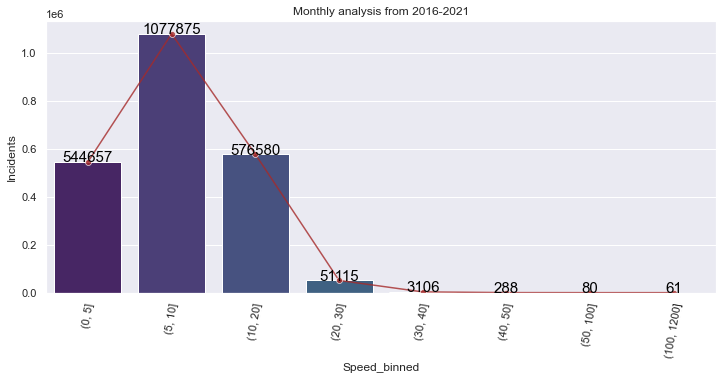

In [77]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(12,5)})
plt.xticks(rotation=80)
plt.rc('font', size=15)
pal = sns.color_palette("viridis", len(Month.index))
sns.lineplot(x=Speed_Analysis.Speed_binned, y=Speed_Analysis.Incidents, marker='o', color = 'brown', alpha = .8);
ax = sns.barplot(x=Speed_Analysis.Speed_binned, y=Speed_Analysis.Incidents, palette=np.array(pal[::1]))
ax.set(title='Monthly analysis from 2016-2021') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height() 
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+100, # y-coordinate position of data label, padded 100 above bar
 s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center', color = 'black') # sets vertical alignment (va) to center

**The most accidents were recorded in the 5-10mph speed, whilst the lowest were recorded between 100-1200mph wind speed.**

## **What was the period of the day when the accidents occurred?**

In [78]:
Sunrise_Sunset=us_accidents.Sunrise_Sunset.value_counts() 
Civil_Twilight=us_accidents.Civil_Twilight.value_counts()
Nautical_Twilight=us_accidents.Nautical_Twilight.value_counts()
Astronomical_Twilight=us_accidents.Astronomical_Twilight.value_counts()

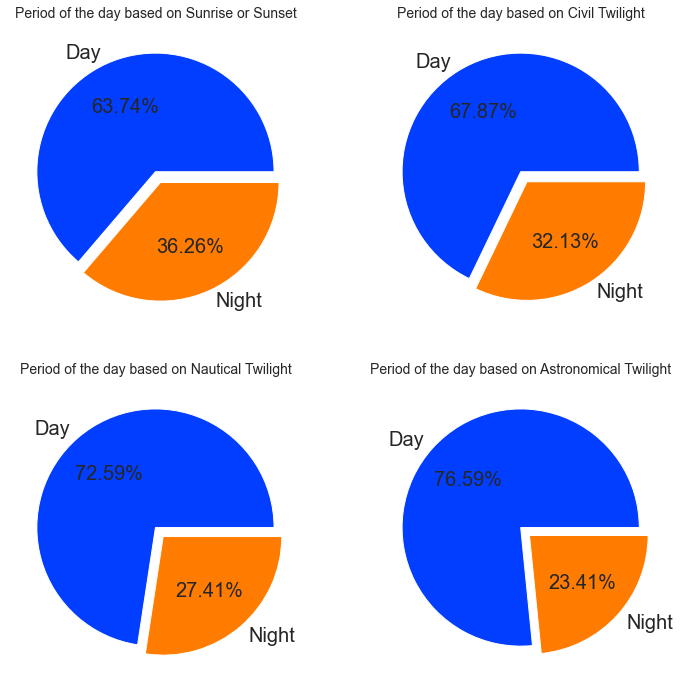

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes[0,0].set_title('Period of the day based on Sunrise or Sunset', fontsize = 14)
axes[0,0].pie(Sunrise_Sunset, labels=Sunrise_Sunset.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[0,1].set_title('Period of the day based on Civil Twilight', fontsize = 14)
axes[0,1].pie(Civil_Twilight, labels=Civil_Twilight.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');


axes[1,0].set_title('Period of the day based on Nautical Twilight', fontsize = 14)
axes[1,0].pie(Nautical_Twilight, labels=Nautical_Twilight.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');

axes[1,1].set_title('Period of the day based on Astronomical Twilight', fontsize = 14)
axes[1,1].pie(Astronomical_Twilight, labels=Astronomical_Twilight.index, colors = palette_color, explode=explode, textprops ={'fontsize': 20}, autopct='%1.2f%%');



**Majority of all accident occurred during the day rather than at night.**